<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/iyeboah22/GIS-DS/blob/main/ps3.ipynb
fantastic topic!!
these are not percents
https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps3.ipynb#scrollTo=1fsSfvhd159F
good interpretations

stuff you discuss map it like climate


**Mental Health Health Disorder Analysis**

 **Research**

 My objective is to transform the provided dataset into a easily visualized format, enabling a comprehensive understanding of the impact of mental health issues and their implications. The focus is on gaining insights into the global connection between various mental illnesses and suicide rates.

Several key questions arise from this dataset:

1. **Types of Mental Health Disorders Globally:**
   - What are the prevalent types of mental health disorders worldwide?

2. **Global Distribution of Mental Health Problems:**
   - How many individuals in each country are affected by mental health problems?

3. **Gender Disparities in Depression:**
   - Are there notable differences between men and women regarding the likelihood of experiencing depression?

4. **Countries with Highest Rates of Depression Disorders:**
   - Which countries exhibit the highest rates of specific depression disorders?

By visualizing this information, my aim is to provide a clearer understanding of the global landscape of mental health issues, offering valuable insights into the distribution of disorders, their prevalence across different populations, and potential correlations with suicide rates. This approach facilitates a more vivid exploration of the complex relationship between mental health conditions and their impact on individuals and societies worldwide.


**Sources**

https://data.world/amitd

aok: but which one above, there is a bunch

https://international.ipums.org/international/gis.shtml

In [1]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

!pip install mapclassify
import mapclassify
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [3]:
#Read in Mental health disorder data
! wget -q -O Mental_Data.csv  https://github.com/iyeboah22/GIS-DS/raw/main/Mental%20health%20Depression%20disorder%20Data.csv
mh_data = pd.read_csv('Mental_Data.csv')

#Read in country coordinates
! wget -q -O countries.csv  https://github.com/iyeboah22/GIS-DS/raw/main/countries%202.csv #aok: there is no such data file countries_2.csv in github! you need to upload it first
countries_coord =pd.read_csv('countries.csv')
#Using lat and long to get geo points
countries_coord = gpd.GeoDataFrame(countries_coord, geometry=gpd.points_from_xy(countries_coord.latitude, countries_coord.longitude))



<ipython-input-3-6ac6f286c02e>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mh_data = pd.read_csv('Mental_Data.csv')


**Cleaning the dataset**

In [4]:
mh_1 = mh_data.iloc[:6467]

mh_2 = mh_data.iloc[6469:54276]
mh_2.columns = mh_data.iloc[6468]
mh_2 = mh_2.iloc[:,:7].drop(columns = 6468)

mh_3 = mh_data.iloc[54277:102084]
mh_3.columns = mh_data.iloc[54276]
mh_3 = mh_3.iloc[:,:7].drop(columns = 54276)

mh_4 = mh_data.iloc[102085:]
mh_4.columns = mh_data.iloc[102084]
mh_4 = mh_4.iloc[:,:5].drop(columns = 102084)

In [5]:
Temp1 =pd.merge(mh_1, mh_2, how='left', on=['Entity', 'Code', 'Year'])
Temp2 = pd.merge(Temp1, mh_3, how='left', on=['Entity', 'Code', 'Year'])
mh_disorder = pd.merge(Temp2, mh_4, how='left', on=['Entity', 'Code', 'Year'])

In [6]:
col_names = {'Entity': 'name',
             'Code': 'code',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo',
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol',
             'Prevalence in males (%)':'males',
             'Prevalence in females (%)':'females',
             'Suicide rate (deaths per 100,000 individuals':'Suicide rates',
             'Depressive disorder rates (number suffering per 100,000)':'Depressive disorder rates',
             'Population_x':'Population'}


mh_disorder.rename(columns=col_names,inplace=True)
mh_disorder['schizo'] = pd.to_numeric(mh_disorder['schizo'], errors='coerce')
mh_disorder['bipolar'] = pd.to_numeric(mh_disorder['bipolar'], errors='coerce')
mh_disorder['eating dis'] = pd.to_numeric(mh_disorder['eating dis'], errors='coerce')
mh_disorder['anxiety'] = pd.to_numeric(mh_disorder['anxiety'], errors='coerce')
mh_disorder['drug'] = pd.to_numeric(mh_disorder['drug'], errors='coerce')
mh_disorder['males'] = pd.to_numeric(mh_disorder['males'], errors='coerce')
mh_disorder['females'] = pd.to_numeric(mh_disorder['females'], errors='coerce')
mh_disorder['Population'] = pd.to_numeric(mh_disorder['Population'], errors='coerce')
mh_disorder['Suicide rate (deaths per 100,000 individuals)'] = pd.to_numeric(mh_disorder['Suicide rate (deaths per 100,000 individuals)'], errors='coerce')
mh_disorder['Depressive disorder rates'] = pd.to_numeric(mh_disorder['Depressive disorder rates'], errors='coerce')
mh_disorder['Population_y'] = pd.to_numeric(mh_disorder['Population_y'], errors='coerce')
mh_disorder['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'] = pd.to_numeric(mh_disorder['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'], errors='coerce')



mh_disorder = mh_disorder.drop(columns= ['index'])
mh_disorder = mh_disorder.drop(columns= ['Population_y'])
mh_disorder = mh_disorder.dropna()

mh_disorder.head()

,name,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol,males,females,Population,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.0,10.318504,4039.755763,318435.813670
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.0,10.327010,4046.256034,329044.773956
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.0,10.271411,4053.709902,382544.572895
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.0,10.376123,4060.203474,440381.507393
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.673050,17076000.0,10.575915,4062.290365,456916.645489


**Explanation of the Dataset**

After a thorough examination of the dataset, it is evident that it is quite intricate. Upon closer inspection, it became apparent that the data can be organized into four distinct tables.

The first table encompasses information on various mental health disorders, including schizophrenia, bipolar disorder, eating disorders, anxiety disorder, drug use disorder, depression, and alcohol disorder. The second table contains data on the prevalence of these disorders among males and females. The third table outlines suicide rates, measured as deaths per 100,000 individuals. Lastly, the fourth table details the prevalence of depressive disorders across different demographics, particularly emphasizing the correlation with suicide.

Having successfully cleaned the dataset, I proceeded to merge it with the corresponding country coordinates for integration into a comprehensive world map. My primary focus was to better analyze the prevalence of people suffering from depressive disorders in 2017 & 2007 with the suicide rates globally.

In [7]:
country_mh = mh_disorder.merge(countries_coord, on='name',how='outer',indicator=True)
country_mh.rename(columns = {'country':'ISO'}, inplace = True)
country_mh.rename(columns = {'name':'COUNTRY'}, inplace = True)
country_mh = country_mh.dropna()
country_mh = country_mh.drop(columns=['code']).rename(columns={'Population_x' : 'Population'}).dropna()


In [8]:
! wget -q -O world.zip https://github.com/iyeboah22/GIS-DS/raw/main/World_Countries_Generalized.zip

zip_ref = zipfile.ZipFile('world.zip', 'r');
zip_ref.extractall();
zip_ref.close();

world_map = gpd.read_file('World_Countries_Generalized/World_Countries_Generalized.shp')

This approach allows for a comparison over time and may reveal trends or changes in the prevalence and impact of these issues. Here are some considerations and potential questions for your analysis:

1. **Temporal Trends in Mental Health Disorders:**
   - How have the prevalence and distribution of mental health disorders changed from 2007 to 2017 globally and within specific regions or countries?

2. **Suicide Rates Over Time:**
   - Are there noticeable fluctuations or patterns in suicide rates from 2007 to 2017?
   - How do these changes correlate with mental health disorder data?

3. **Impact of Interventions or Awareness Programs:**
   - If there were interventions, awareness campaigns, or policy changes between 2007 and 2017, how have they influenced the relationship between mental health and suicide rates?

4. **Comparative Analysis:**
   - What are the similarities and differences in the distribution of mental health disorders and suicide rates between 2015 and 2017?
   - Are there regions or countries that have experienced significant shifts over this time period?

These questions can help gain insights into the dynamic nature of mental health and suicide issues, allowing for a more comprehensive understanding of the evolving landscape and potential factors influencing these trends.

In [9]:
country_mh_2017 = country_mh[country_mh['year']=='2017']
mh_map = pd.merge(world_map,country_mh_2017, on='COUNTRY')

mh_map = mh_map.drop("ISO_y",axis=1)
mh_map = mh_map.drop("geometry_y",axis=1)

mh_map.rename(columns = {'ISO_x':'ISO'}, inplace = True)
mh_map.rename(columns = {'geometry_x':'geometry'}, inplace = True)

mh_map = mh_map.dropna()

country_mh_2007 = country_mh[country_mh['year']=='2007']
mh_map1 = pd.merge(world_map,country_mh_2007, on='COUNTRY')

mh_map1.rename(columns = {'ISO_x':'ISO'}, inplace = True)
mh_map1.rename(columns = {'geometry_x':'geometry'}, inplace = True)

mh_map1 = mh_map1.dropna()



**2017 vs. 2007**

Analyzing the dataset reveals cases of moderate or severe depression.While it is important to note that the majority of individuals with depression do not attempt or die by suicide, there is a notable association between depression and an increased risk of suicide. Studies suggest that around 60 percent of those who succumb to suicide have experienced a mood disorder, such as depression or bipolar disorder.

This demographic also shows he population facing suicide risk is contending with challenges related to alcohol or drug misuse.  

<Axes: >

[]

[]

<Axes: >

[]

[]

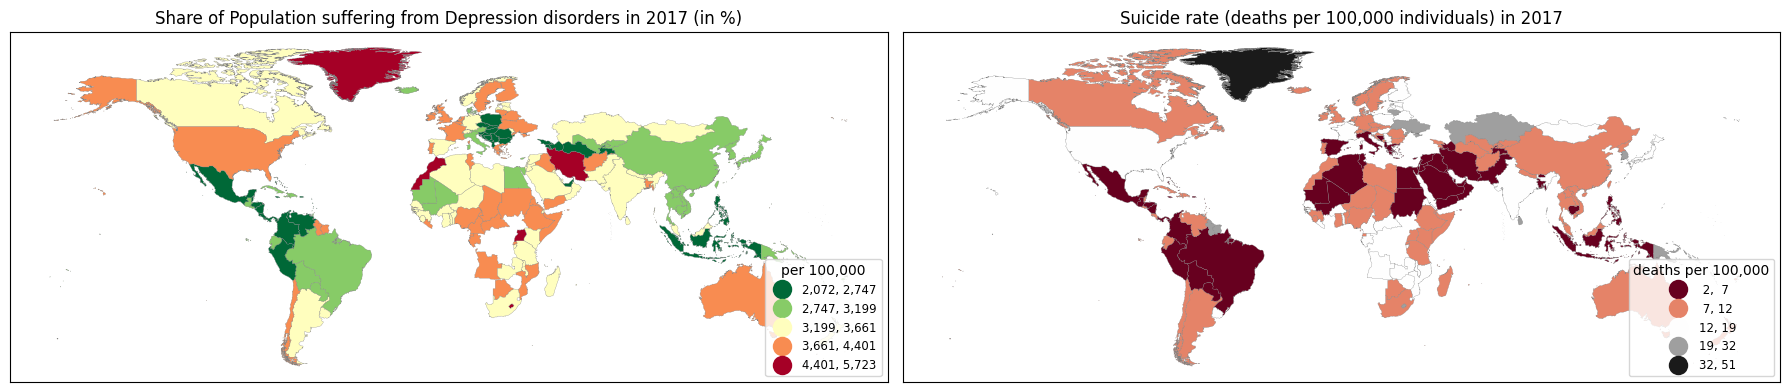

In [10]:
fig, axs = plt.subplots(1,2, figsize=(18,15),sharey=True, tight_layout=True)
mh_map.plot(ax=axs[0],column='Depressive disorder rates',legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4,
                                                      'title': 'per 100,000'}) #
axs[0].title.set_text("Share of Population suffering from Depression disorders in 2017 (in %)")
axs[0].set_xticks([]); axs[0].set_yticks([])

mh_map.plot(ax=axs[1],column='Suicide rate (deaths per 100,000 individuals)',legend=True,cmap='RdGy',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4, 'title':'deaths per 100,000'}) #
axs[1].title.set_text("Suicide rate (deaths per 100,000 individuals) in 2017")
axs[1].set_xticks([]); axs[1].set_yticks([])



<Axes: >

[]

[]

<Axes: >

[]

[]

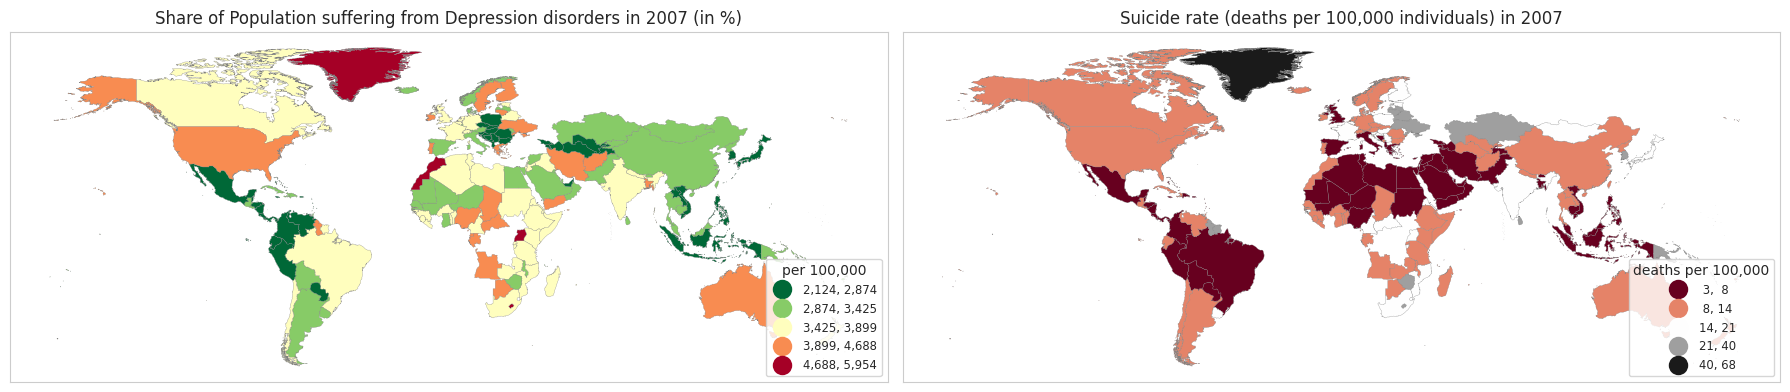

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(18,15),sharey=True, tight_layout=True)
mh_map1.plot(ax=axs[0],column='Depressive disorder rates',legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4,
                                                      'title': 'per 100,000'}) #
axs[0].title.set_text("Share of Population suffering from Depression disorders in 2007 (in %)")
axs[0].set_xticks([]); axs[0].set_yticks([])

mh_map1.plot(ax=axs[1],column='Suicide rate (deaths per 100,000 individuals)',legend=True,cmap='RdGy',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4, 'title':'deaths per 100,000'}) #
axs[1].title.set_text("Suicide rate (deaths per 100,000 individuals) in 2007")
axs[1].set_xticks([]); axs[1].set_yticks([])


In [ ]:
#2017
px.scatter(mh_map, x="Depressive disorder rates", y="Suicide rate (deaths per 100,000 individuals)", color="Suicide rate (deaths per 100,000 individuals)",
                  hover_data=['COUNTRY'],width=1000,height=600)

In [ ]:
#2007
px.scatter(mh_map1, x="Depressive disorder rates", y="Suicide rate (deaths per 100,000 individuals)", color="Suicide rate (deaths per 100,000 individuals)",
                  hover_data=['COUNTRY'],width=1000,height=600)

Now you begin to notice that greenland stands out as well as the slight change within the United States.

In [ ]:
mh_heat = mh_map[['COUNTRY','Depressive disorder rates','Suicide rate (deaths per 100,000 individuals)']].sort_values(by='Depressive disorder rates', ascending=False)
sty = mh_heat.style.background_gradient(cmap='RdGy')
sty


,COUNTRY,Depressive disorder rates,"Suicide rate (deaths per 100,000 individuals)"
63,Greenland,5722.814192,51.063239
92,Lesotho,5494.405796,31.715218
110,Morocco,5190.655729,7.146972
76,Iran,4875.146087,5.447744
164,Uganda,4840.697794,11.543962
55,Finland,4400.604292,12.944947
168,United States,4399.536065,12.835757
32,Central African Republic,4172.571933,16.926897
153,Sweden,4137.456151,11.076736
9,Australia,4137.162467,11.046885


In [ ]:
mh_heat = mh_map[['COUNTRY','Depressive disorder rates','drug','bipolar','schizo','Suicide rate (deaths per 100,000 individuals)']].sort_values(by='Suicide rate (deaths per 100,000 individuals)', ascending=False)
sty = mh_heat.style.background_gradient(cmap='RdGy')
sty

,COUNTRY,Depressive disorder rates,drug,bipolar,schizo,"Suicide rate (deaths per 100,000 individuals)"
63,Greenland,5722.814192,1.994755,0.595421,0.322250,51.063239
92,Lesotho,5494.405796,0.768875,0.606321,0.161376,31.715218
95,Lithuania,3875.468354,0.631073,0.700278,0.200982,27.990584
86,Kiribati,3120.534752,0.720942,0.424041,0.208108,26.378631
69,Guyana,4009.351298,0.732391,0.846088,0.186468,26.072110
165,Ukraine,3830.536060,0.711814,0.687572,0.190966,25.622225
152,Suriname,3819.925626,0.701883,0.869735,0.186999,24.783072
124,Papua New Guinea,3122.792377,0.738106,0.411127,0.209555,23.074353
84,Kazakhstan,3332.684149,0.605455,0.667338,0.199892,22.985528
103,Marshall Islands,3030.202220,0.774688,0.429062,0.218616,22.461095



Upon analysis, it became evident that Greenland exhibited the highest share of its population grappling with depressive disorders, and concurrently, it recorded the highest suicide rate. Interestingly, the lowest suicide rates were observed in regions primarily situated in South America and Africa. However, when comparing these regions to the prevalence of depressive disorders, the data revealed a more moderate level, particularly in South America. In Africa, the rates varied, with higher instances in North Africa and the central region, albeit with a scattered distribution.

Further exploration into the dataset, focusing on 2010, underscored that Greenland continued to exhibit the highest rates of both depressive disorders and suicide. Subsequent background research unveiled a correlation between Greenland's elevated rates and its unique geographical factors, specifically the challenging climate and isolation.

In summary, the data analysis brings to light the intriguing interplay between geographical factors and mental health indicators. Greenland, with its distinct conditions, stands out as a case study, emphasizing the need for a nuanced understanding of the complex relationship between environment and mental health outcomes.

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='COUNTRY', ylabel='Depressive disorder rates'>

Text(0.5, 1.0, 'Highest rates of Depression disoder in 2017')

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Average population %')

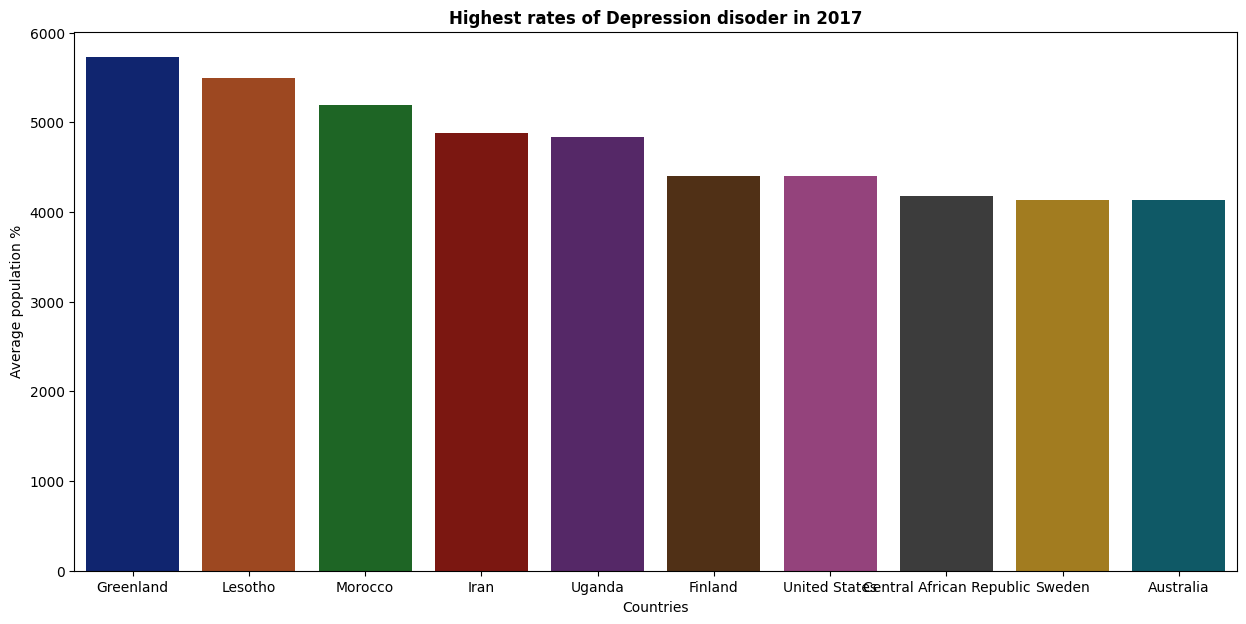

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data = mh_map,
            x = 'COUNTRY',
            y = 'Depressive disorder rates',
            order = mh_map.sort_values('Depressive disorder rates', ascending = False).COUNTRY.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Highest rates of Depression disoder in 2017',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Average population %')

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='COUNTRY', ylabel='Depressive disorder rates'>

Text(0.5, 1.0, 'Highest rates of Depression disoder in 2007')

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Average population %')

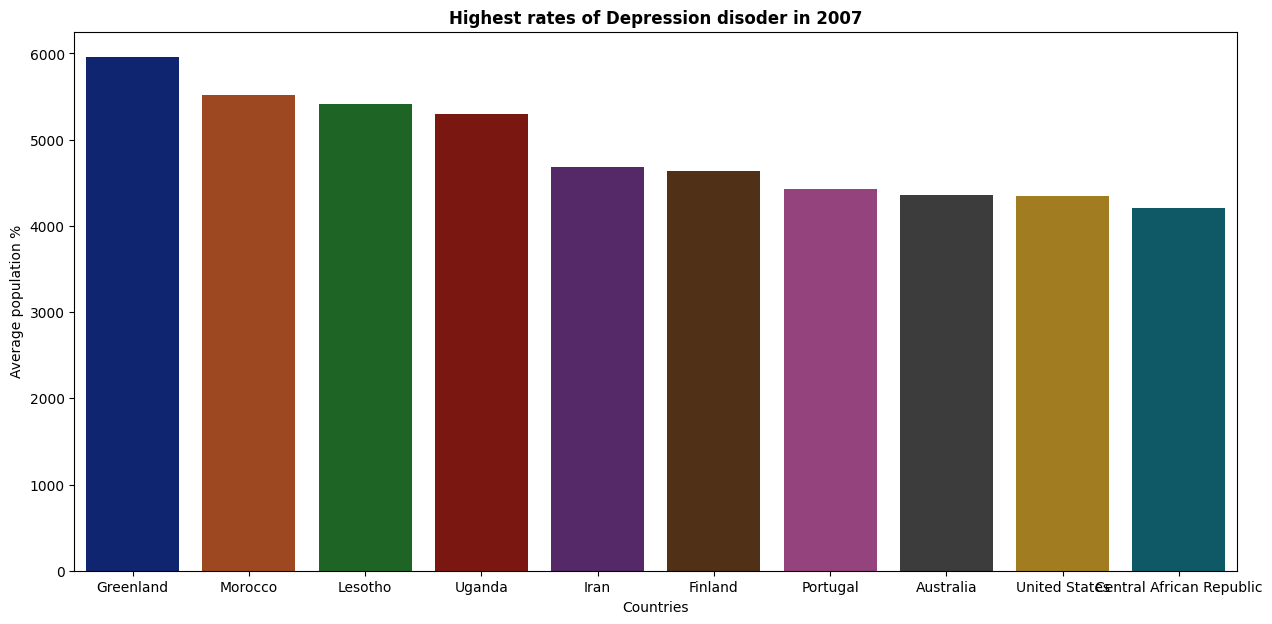

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data = mh_map1,
            x = 'COUNTRY',
            y = 'Depressive disorder rates',
            order = mh_map1.sort_values('Depressive disorder rates', ascending = False).COUNTRY.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Highest rates of Depression disoder in 2007',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Average population %')

Which countries have the highest suicide rate?

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='Suicide rate (deaths per 100,000 individuals)', ylabel='COUNTRY'>

Text(0.5, 1.0, 'Highest Suicide rate in 2017(deaths per 100,000 individuals)')

Text(0.5, 0, 'Suicide rate %')

Text(0, 0.5, 'COUNTRY')

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='Suicide rate (deaths per 100,000 individuals)', ylabel='COUNTRY'>

Text(0.5, 1.0, 'Highest Suicide rate in 2007(deaths per 100,000 individuals)')

Text(0.5, 0, 'Suicide rate %')

Text(0, 0.5, 'COUNTRY')

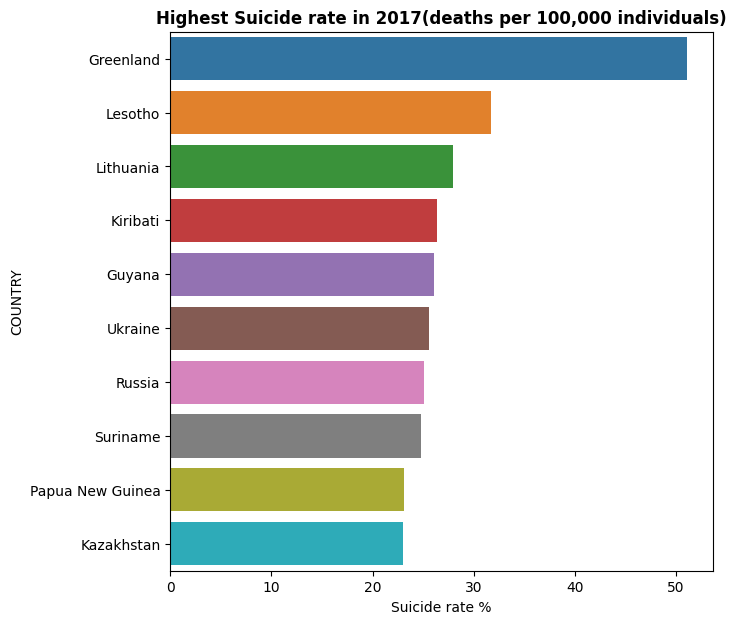

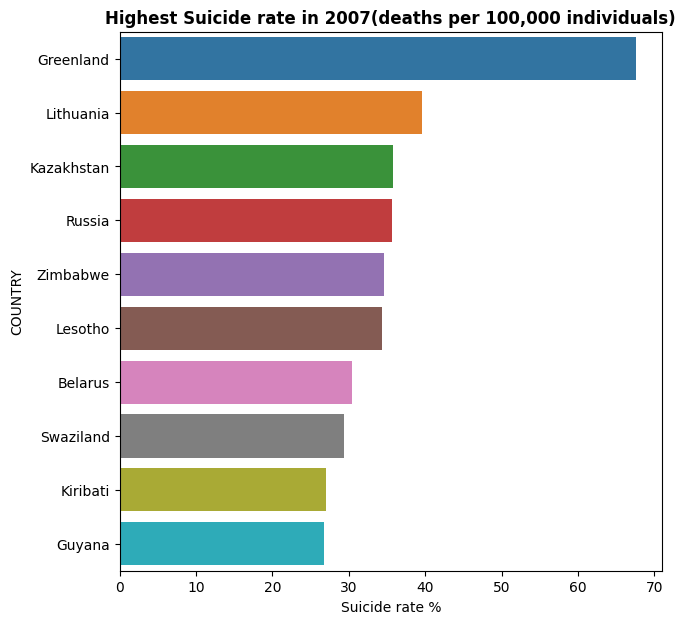

In [ ]:
suicidepercountry= country_mh_2017.groupby('COUNTRY')[['Suicide rate (deaths per 100,000 individuals)']].mean().reset_index()

plt.figure(figsize = (7,7))
sns.barplot(data = suicidepercountry,
            x = 'Suicide rate (deaths per 100,000 individuals)',
            y = 'COUNTRY',
            order = suicidepercountry.sort_values('Suicide rate (deaths per 100,000 individuals)', ascending = False).COUNTRY.head(10))

#Set title, legend and x y axis
plt.title('Highest Suicide rate in 2017(deaths per 100,000 individuals)',
          fontweight='bold')

plt.xlabel('Suicide rate %')
plt.ylabel('COUNTRY')

suicidepercountry1= country_mh_2007.groupby('COUNTRY')[['Suicide rate (deaths per 100,000 individuals)']].mean().reset_index()

plt.figure(figsize = (7,7))
sns.barplot(data = suicidepercountry1,
            x = 'Suicide rate (deaths per 100,000 individuals)',
            y = 'COUNTRY',
            order = suicidepercountry1.sort_values('Suicide rate (deaths per 100,000 individuals)', ascending = False).COUNTRY.head(10))

#Set title, legend and x y axis
plt.title('Highest Suicide rate in 2007(deaths per 100,000 individuals)',
          fontweight='bold')

plt.xlabel('Suicide rate %')
plt.ylabel('COUNTRY')

In [ ]:
Greenland = country_mh[country_mh['COUNTRY'] == 'Greenland']
Greenland.set_index('year')

<Figure size 1700x1000 with 0 Axes>

<Axes: xlabel='year', ylabel='Suicide rate (deaths per 100,000 individuals)'>

Text(0.5, 1.0, 'Suicide rate (deaths per 100,000 individuals) on Greenland')

Text(0, 0.5, 'Deaths per 100,000 individuals')

Text(0.5, 0, 'Years')

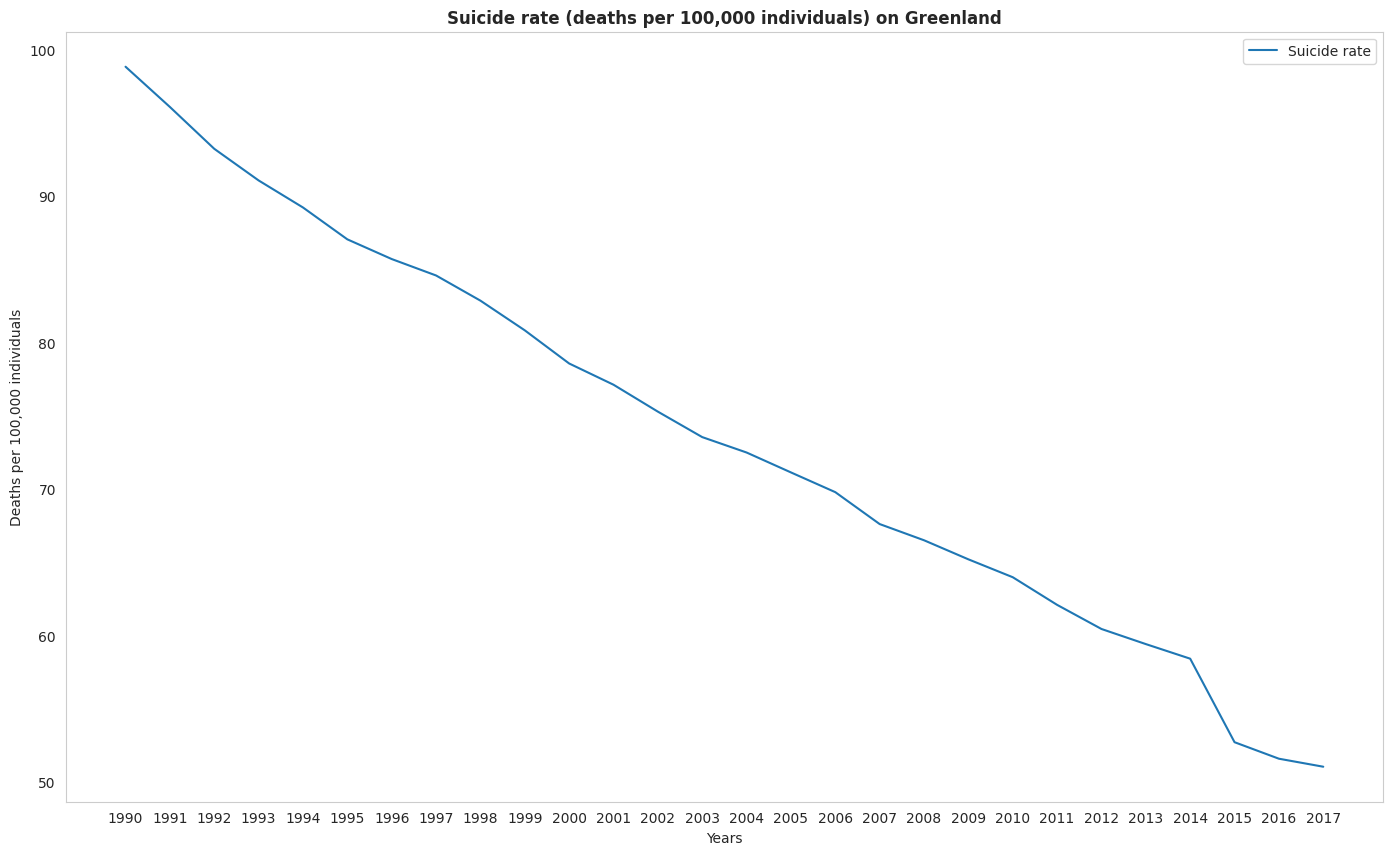

In [ ]:
plt.figure(figsize = (17,10))
sns.set_style('whitegrid')

sns.lineplot(data=Greenland, x="year", y="Suicide rate (deaths per 100,000 individuals)", label="Suicide rate")


plt.title('Suicide rate (deaths per 100,000 individuals) on Greenland',
          fontweight='bold')
plt.ylabel('Deaths per 100,000 individuals')
plt.xlabel('Years')


plt.grid(False)



**Greenland continuously has the highest rate of suicide, an occurrence commonly involving feelings of isolation and depression (Hersher, 2016). Inuit Indigenous peoples make up 89% of Greenland's population which means that mental health issues are particularly prevalent in Inuit communities (Chow, 2019).**

**Why is the majority of Greenland so depressed?**

**Greenland is culturally and geographically isolated as well as one of the coldest and least populous nations in the world. Although factors such as these have been known to contribute to suicide-related issues, it remains unclear if they have a direct influence on Greenlandic suicides or to what degree.**

In [ ]:
US = country_mh[country_mh['COUNTRY'] == 'United States']
US.set_index('year')

<Figure size 1700x1000 with 0 Axes>

<Axes: xlabel='year', ylabel='Suicide rate (deaths per 100,000 individuals)'>

Text(0.5, 1.0, 'Suicide rate (deaths per 100,000 individuals) on United States')

Text(0, 0.5, 'Deaths per 100,000 individuals')

Text(0.5, 0, 'Years')

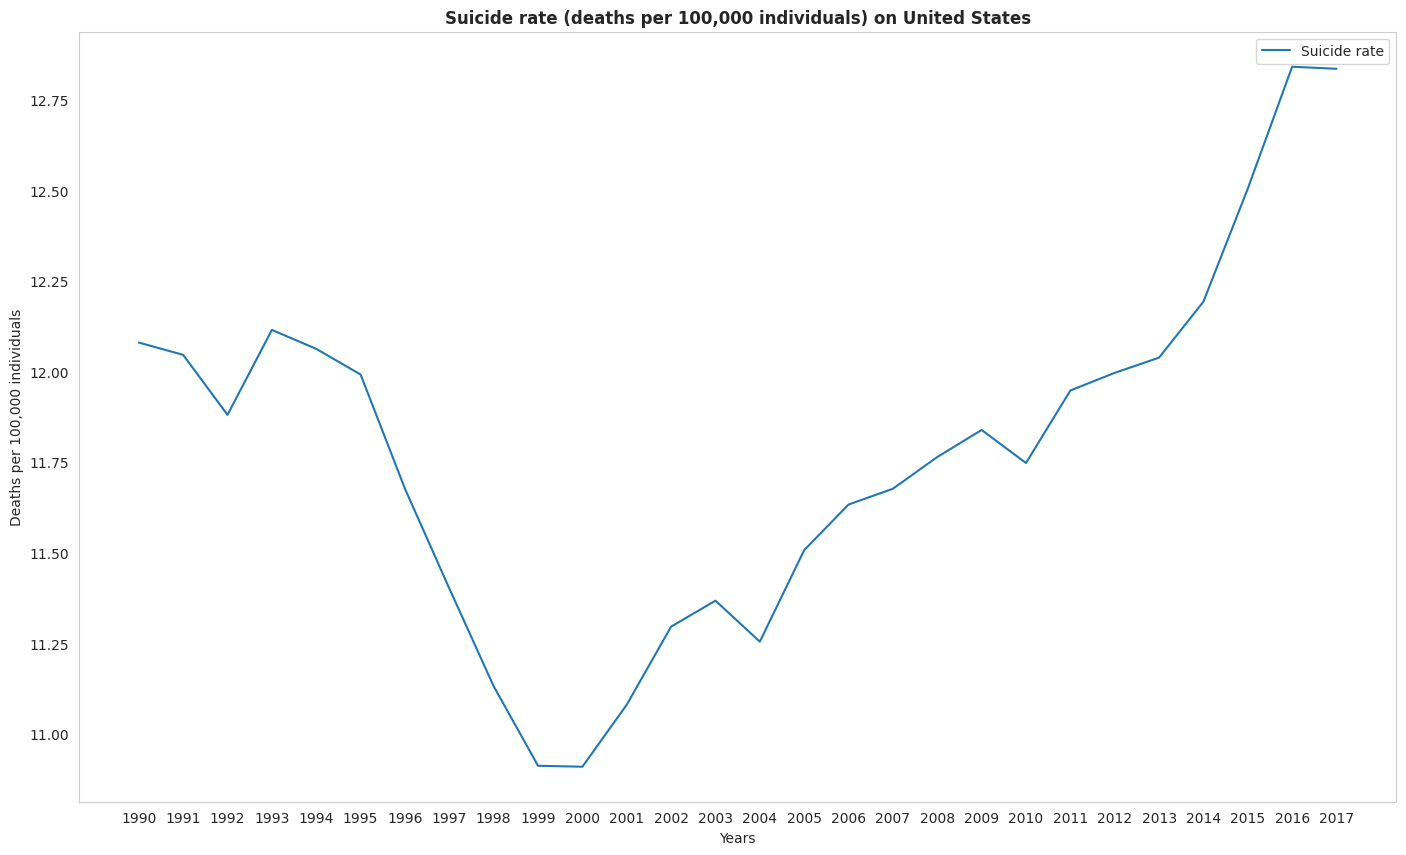

In [ ]:
plt.figure(figsize = (17,10))
sns.set_style('whitegrid')

sns.lineplot(data=US, x="year", y="Suicide rate (deaths per 100,000 individuals)", label="Suicide rate")


plt.title('Suicide rate (deaths per 100,000 individuals) on United States',
          fontweight='bold')
plt.ylabel('Deaths per 100,000 individuals')
plt.xlabel('Years')


plt.grid(False)
